## Курсовой проект "Алгоритмы анализа данных"  
  
#### Задача Регрессии  - предсказать средний балл на экзамене по математике, который получают ученики репетиторов из датасета test.csv.   

#### Даны два датасета: train.csv (содержит признаки и целевую переменную) и test.csv (только признаки).

Можно использовать ограниченное количество импортированных библиотек:

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

#дополнительно отключу предупреждения
import warnings
warnings.filterwarnings('ignore')

#### Метрика - коэффициент детерминации R2 

In [24]:
def calc_r2_score(true, pred):
    r2 = 1 - (np.sum((true-pred)**2)/np.sum((true - np.mean(true))**2))
    return r2

In [25]:
def evaluate_model(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    r2_train = 1 - (np.sum((y_train-y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2))
    r2_test = 1 - (np.sum((y_test-y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2))
    print(f'R2 score train: {r2_train}, R2 score test: {r2_test}')

#### Загрузим данные

In [26]:
TRAIN_DATASET_PATH = './train.csv'
TEST_DATASET_PATH = './test.csv'

In [27]:
df_train = pd.read_csv(TRAIN_DATASET_PATH)
df_test = pd.read_csv(TEST_DATASET_PATH)

In [28]:
# Изучим внешний вид данных

df_train.head(5)

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,61
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,76
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,54
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,57


In [29]:
df_test.head(5)

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,10000,46.0,3.0,1050.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,10001,43.0,3.0,1850.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10002,52.0,1.0,1550.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,10003,57.0,6.0,2900.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0
4,10004,44.0,4.0,3150.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0


Проверим на наличие пропусков:

In [30]:
df_train.isna().sum()

Id                     0
age                    0
years_of_experience    0
lesson_price           0
qualification          0
physics                0
chemistry              0
biology                0
english                0
geography              0
history                0
mean_exam_points       0
dtype: int64

In [31]:
df_test.isna().sum()

Id                     0
age                    0
years_of_experience    0
lesson_price           0
qualification          0
physics                0
chemistry              0
biology                0
english                0
geography              0
history                0
dtype: int64

Видимых категориальных признаков, нуждающихся в перекодировке - нет

In [32]:
df_train['Id'].nunique()

10000

In [33]:
df_test['Id'].nunique()

10000

In [34]:
# Т к признак Id - просто порядковый номер - уберем его из датасета, он бесполезен , а также может навредить модели
df_train.drop('Id', axis = 1, inplace = True)
df_test.drop('Id', axis = 1, inplace = True)

In [35]:
# Перепроверим типы данных
df_train.dtypes

age                    float64
years_of_experience    float64
lesson_price           float64
qualification          float64
physics                float64
chemistry              float64
biology                float64
english                float64
geography              float64
history                float64
mean_exam_points         int64
dtype: object

In [36]:
df_test.dtypes

age                    float64
years_of_experience    float64
lesson_price           float64
qualification          float64
physics                float64
chemistry              float64
biology                float64
english                float64
geography              float64
history                float64
dtype: object

**Целевая переменная - mean_exam_points**

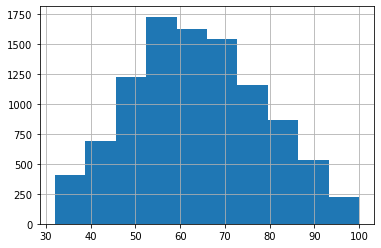

In [37]:
df_train['mean_exam_points'].hist()
plt.show()

Распределение целевой переменной очень близко к нормальному

In [38]:
df_train.columns

Index(['age', 'years_of_experience', 'lesson_price', 'qualification',
       'physics', 'chemistry', 'biology', 'english', 'geography', 'history',
       'mean_exam_points'],
      dtype='object')

In [39]:
# Изучим количество уникальных значений каждого признака
unique_train = pd.DataFrame({'age_': [df_train['age'].nunique()],
                    'years_of_experience': [df_train['years_of_experience'].nunique()],
                      'lesson_price':[df_train['lesson_price'].nunique()],
                      'qualification':[df_train['qualification'].nunique()],
                      'physics':[df_train['physics'].nunique()],
                      'chemistry':[df_train['chemistry'].nunique()],
                      'biology': [df_train['biology'].nunique()],
                      'english': [df_train['english'].nunique()],
                      'geography':[df_train['geography'].nunique()],
                      'history': [df_train['history'].nunique()]})

unique_test = pd.DataFrame({'age_': [df_test['age'].nunique()],
                    'years_of_experience': [df_test['years_of_experience'].nunique()],
                      'lesson_price':[df_test['lesson_price'].nunique()],
                      'qualification':[df_test['qualification'].nunique()],
                      'physics':[df_test['physics'].nunique()],
                      'chemistry':[df_test['chemistry'].nunique()],
                      'biology': [df_test['biology'].nunique()],
                      'english': [df_test['english'].nunique()],
                      'geography':[df_test['geography'].nunique()],
                      'history': [df_test['history'].nunique()]})
display(unique_train, unique_test)

,age_,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,46,11,74,4,2,2,2,2,2,2


,age_,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,46,11,72,4,2,2,2,2,2,2


Изучим признаки с количество уникальных значений более 2-х на наличие выбросов

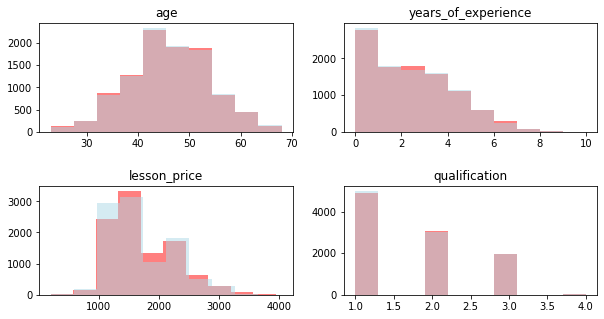

In [40]:
# 'age', 'years_of_experience', 'lesson_price', 'qualification'
fig, ax = plt.subplots(2,2)
fig.set_size_inches(10,5)
ax[0,0].hist(df_train['age'], color='red', alpha = 0.5)
ax[0,0].hist(df_test['age'], color='lightblue', alpha = 0.5)
ax[0,0].set_title('age')

ax[0,1].hist(df_train['years_of_experience'], color='red', alpha = 0.5)
ax[0,1].hist(df_test['years_of_experience'], color='lightblue', alpha = 0.5)
ax[0,1].set_title('years_of_experience')

ax[1,0].hist(df_train['lesson_price'], color='red', alpha = 0.5)
ax[1,0].hist(df_test['lesson_price'], color='lightblue', alpha = 0.5)
ax[1,0].set_title('lesson_price')

ax[1,1].hist(df_train['qualification'], color='red', alpha = 0.5)
ax[1,1].hist(df_test['qualification'], color='lightblue', alpha = 0.5)
ax[1,1].set_title('qualification')

plt.subplots_adjust(hspace = 0.5) #добавили вертикальный отступ между графиками
plt.show()

В целом распределение признаков на тренировочном и тестовом наборах данных очень похоже. Есть небольшие расхождения только в признаке lesson_price. Видимых выбросов нет

**Изучим корреляцию между признаками**

<AxesSubplot:>

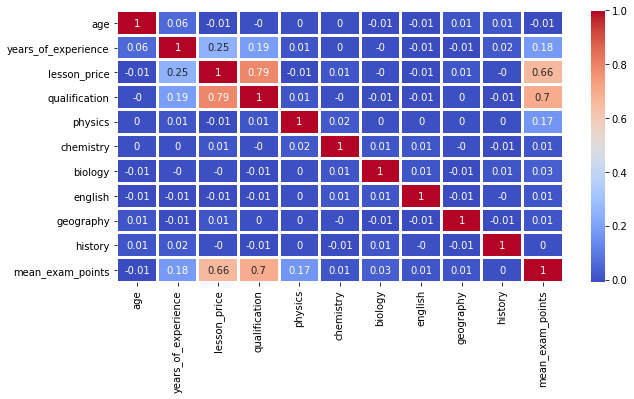

In [41]:
corr_matrix = df_train.corr()
corr_matrix = np.round(corr_matrix,2)
plt.figure(figsize = (10,5))
sns.heatmap(corr_matrix, annot=True, linewidth = 2, cmap = 'coolwarm')

In [42]:
# Проведем стандартизацию:
def normalize(X):
    x_max = X.max(axis=0)
    x_min = X.std(axis=0)
    new_X = (X - x_min) / (x_max-x_min)
    return new_X

In [43]:
#df_norm = data_train.copy()

In [44]:
#df_norm['age'] = normalize(df_norm['age'])
#df_norm['years_of_experience'] = normalize(df_norm['years_of_experience'])
#df_norm['qualification'] = normalize(df_norm['qualification'])
#df_norm['lesson_price'] = normalize(df_norm['lesson_price'])
#df_norm['qualification * years_of_experience'] = normalize(df_norm['qualification * years_of_experience'])


Поскольку решили использовать модель основанную на решающих деревьях, машстабировать признаки не будем

In [45]:
#Добавим новые признаки:

# 1) общая квалификация
df_train['qualification * years_of_experience'] = df_train['qualification'] * df_train['years_of_experience']
df_test['qualification * years_of_experience'] = df_test['qualification'] * df_test['years_of_experience']

# 2) с какого возраста преподает
df_train['teaching_since'] = df_train['age'] - df_train['years_of_experience']
df_test['teaching_since'] = df_test['age'] - df_test['years_of_experience']

#3) соотношение качества и цены
df_train['ratio quality/price'] = df_train['qualification']/df_train['lesson_price']
df_test['ratio quality/price'] = df_test['qualification']/df_test['lesson_price']

In [46]:
df_train.columns

Index(['age', 'years_of_experience', 'lesson_price', 'qualification',
       'physics', 'chemistry', 'biology', 'english', 'geography', 'history',
       'mean_exam_points', 'qualification * years_of_experience',
       'teaching_since', 'ratio quality/price'],
      dtype='object')

In [47]:
FINAL_FEATURE_NAMES = ['age',
                       'years_of_experience',
                       'lesson_price', 
                       'qualification', 
                       'physics', 
                       #'chemistry', 
                       #'biology', 
                       #'english', 
                       #'geography', 
                       #'history',
                       #'qualification * years_of_experience',
                       #'teaching_since', 
                       #'ratio quality/price'
                      ]


# Практика показала, что дополнительно созданные признаки не привдят к улучшению результата
# Также оставим 1 бинарный признак, имеющий корреляцию с таргетом

In [48]:
#Попробуем добавить новый признак

target = df_train['mean_exam_points']

df_train.drop('mean_exam_points', axis = 1, inplace = True)
X = df_train[FINAL_FEATURE_NAMES]
y = target

df_test = df_test[FINAL_FEATURE_NAMES]



In [49]:
X.head(5)

,age,years_of_experience,lesson_price,qualification,physics
0,40.0,0.0,1400.0,1.0,1.0
1,48.0,4.0,2850.0,3.0,1.0
2,39.0,0.0,1200.0,1.0,0.0
3,46.0,5.0,1400.0,1.0,0.0
4,43.0,1.0,1500.0,1.0,0.0


In [50]:
# Сделаем разбиение на обучающую и валидационную выборку в рамках тренировочного набора данных

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle= True, stratify=y, random_state = 1)

### Обучение моделей

In [51]:
# Переведем имеющиеся датасеты в массивы numpy.array

#X_train = np.array(X_train)
#y_train = np.array(y_train)

#X_test = np.array(X_test)
#y_test = np.array(y_test)

X_train = X_train.values
y_train = y_train.values

X_test = X_test.values
y_test=y_test.values

In [52]:
def mse_calc(y, y_pred):
    mse = np.mean((y - y_pred) ** 2)
    return mse

##### Градиентный бустинг - Gradient Boosting

In [53]:
# Реализуем класс узла

class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [54]:
class Leaf:
    
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets
        self.prediction = self.predict()
        
    def predict(self):
        return self.targets.mean()
        

In [55]:
class RegressionTree:
    
    def __init__(self, max_depth = 50, depth = 0):
        self.max_depth = max_depth
        self.depth = depth
        self.tree=None
        
    def criterion(self, targets):
        # критерии и в задаче регрессии, и в задаче классификации должен стремиться к 0
        return np.mean((targets - targets.mean())**2)
    
    def gain(self, left_targets, right_targets, root):

        # доля выборки, ушедшая в левое поддерево
        p = float(left_targets.shape[0]) / (left_targets.shape[0] + right_targets.shape[0])

        return root - p * self.criterion(left_targets) - (1 - p) * self.criterion(right_targets) 
    
    def get_subsample(self, len_sample):
        # выводим индексы признаков
        sample_indexes = list(range(len_sample))
        
        # В задаче регрессии рекомендовали создавать выборку = кол-во признаков/3
        len_subsample = int(len_sample/3)

        subsample = np.random.choice(sample_indexes, size=len_subsample, replace=False)

        return subsample
    
    def split(self, data, targets, index, t):
        
        left = np.where(data[:, index] <= t) # t - порог вопроса
        right = np.where(data[:, index] > t)
        
        true_data = data[left]
        false_data = data[right]
        true_targets = targets[left]
        false_targets = targets[right]
        
        return true_data, false_data, true_targets, false_targets
        
    def find_best_split(self, data, targets):
        
        min_samples_leaf = 5
        
        root = self.criterion(targets)
        best_gain = 0
        best_t = None
        best_index = None

        n_features = data.shape[1]
        subsample = self.get_subsample(n_features)
        
        for index in subsample:
            # будем проверять только уникальные значения признака, исключая повторения
            t_values = np.unique(data[:, index])

            for t in t_values:
                
                true_data, false_data, true_targets, false_targets = self.split(data, targets, index, t)
                
                #  пропускаем разбиения, в которых в узле остается менее 5 объектов
                if len(true_data) < min_samples_leaf or len(false_data) < min_samples_leaf:
                    continue

                current_gain = self.gain(true_targets, false_targets, root)

                #  выбираем порог, на котором получается максимальный прирост качества
                if current_gain > best_gain:
                    best_gain, best_t, best_index = current_gain, t, index

        return best_gain, best_t, best_index
    
    def build_tree(self, data, targets, depth, max_depth):
        
        gain, t, index = self.find_best_split(data, targets)
        
        if gain == 0 or depth > max_depth:
            return Leaf(data, targets)
        
        depth +=1
        
        true_data, false_data, true_targets, false_targets = self.split(data, targets, index, t)
        
        true_branch = self.build_tree(true_data, true_targets, depth, max_depth)
        false_branch = self.build_tree(false_data, false_targets, depth, max_depth)
        
        return Node(index, t, true_branch, false_branch)

    def predict_object(self, obj, node):
         
        if isinstance(node, Leaf):
            answer = node.prediction
            return answer
        if obj[node.index] <= node.t:
            return self.predict_object(obj, node.true_branch)
        else:
            return self.predict_object(obj, node.false_branch)
    
    def predict(self, data):
        pred_values = []
        for obj in data:
            prediction = self.predict_object(obj, self.tree)
            pred_values.append(prediction)
        return pred_values
    
    def fit(self, data, targets):
        self.tree = self.build_tree(data, targets,  self.depth, self.max_depth)
        return self
            

In [56]:
regr_tree = RegressionTree(max_depth=10)
evaluate_model(X_train, y_train, X_test, y_test, regr_tree)

R2 score train: 0.6021047365425782, R2 score test: 0.5775027120338205


#### Реализуем градиентный бустинг

In [57]:
class GradBoost:
    
    def __init__(self, n_trees, max_depth, eta):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.eta = eta
        self.trees = []

    def residual(self, y, z):
        return 2*(y - z)

    def fit(self, X, y):
        for i in range(self.n_trees):
            tree = RegressionTree(max_depth = self.max_depth)

            # первый алгоритм просто обучаем на выборке и добавляем в список
            if len(self.trees) == 0:
                # обучаем первое дерево на обучающей выборке
                tree.fit(X, y)

            else:
                # Получим ответы на текущей композиции
                targets = self.predict(X)

                # алгоритмы начиная со второго обучаем на сдвиг
                tree.fit(X, self.residual(y, targets))
                
            self.trees.append(tree)
        return self.trees

    def predict(self, X):
        predictions = np.array([sum([self.eta * alg.predict([x])[0] for alg in self.trees]) for x in X])
        return predictions

In [58]:
n_trees = 120
max_depth = 5
eta = 0.1


gb_model = GradBoost(n_trees = n_trees, max_depth = max_depth, eta = eta)

In [59]:
evaluate_model(X_train, y_train, X_test, y_test, gb_model)

R2 score train: 0.7080999020674826, R2 score test: 0.6430870445099295


#### Реализуем стохастический градиентный бустинг

In [60]:
class StohasticGradBoost:
    
    def __init__(self, n_trees, max_depth, eta, border):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.eta = eta
        self.border = border
        self.trees = []

    def residual(self, y, z):
        return 2*(y - z)

    def fit(self, X, y):
        for i in range(self.n_trees):
            # Выделим выборку для обучения дерева, выделив случайные индексы в размере border
            sample_indices = np.random.randint(X.shape[0], size = int(X.shape[0]*self.border))
            X_sampled = X[sample_indices]
            y_sampled = y[sample_indices]
            tree = RegressionTree(max_depth = self.max_depth)

            # первый алгоритм просто обучаем на выборке и добавляем в список
            if len(self.trees) == 0:
                # обучаем первое дерево на обучающей выборке
                tree.fit(X_sampled, y_sampled)

            else:
                # Получим ответы на текущей композиции
                targets = self.predict(X_sampled)

                # алгоритмы начиная со второго обучаем на сдвиг
                tree.fit(X_sampled, self.residual(y_sampled, targets))
                
            self.trees.append(tree)
        return self.trees

    def predict(self, X):
        predictions = np.array([sum([self.eta * alg.predict([x])[0] for alg in self.trees]) for x in X])
        return predictions

In [61]:
n_trees = 70
max_depth = 5
eta = 0.08

sgb_model = StohasticGradBoost(n_trees, max_depth, eta, border = 0.5)

In [62]:
evaluate_model(X_train, y_train, X_test, y_test, sgb_model)

R2 score train: 0.6818133760777172, R2 score test: 0.642408356427578


#### Реализуем вариант стохастического градиентного бустинга с использованием бутстрапа

In [63]:
class StohasticGradBoost_bootstrap:
    
    def __init__(self, n_trees, max_depth, eta):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.eta = eta
        self.trees = []

    def residual(self, y, z):
        return 2*(y - z)
    
    def bootstrap(self, X, y, N): # N -количество выборок
        n_samples =len(range(X.shape[0]))
        bootstrap = []
        for i in range(N):
            indices_for_b = np.random.randint(0, X.shape[0], size = n_samples)
            X_b = X[indices_for_b]
            y_b = y[indices_for_b]
            bootstrap.append((X_b, y_b))
        return bootstrap
        

    def fit(self, X, y):
        
        bootstrap = self.bootstrap(X, y, self.n_trees)
        
        for i in range(self.n_trees):
            X_b_sample = bootstrap[i][0]
            y_b_sample = bootstrap[i][1]
            tree = RegressionTree(max_depth = self.max_depth)

            # первый алгоритм просто обучаем на выборке и добавляем в список
            if len(self.trees) == 0:
                # обучаем первое дерево на обучающей выборке
                tree.fit(X_b_sample, y_b_sample)

            else:
                # Получим ответы на текущей композиции
                targets = self.predict(X_b_sample)

                # алгоритмы начиная со второго обучаем на сдвиг
                tree.fit(X_b_sample, self.residual(y_b_sample, targets))
                
            self.trees.append(tree)
        return self.trees

    def predict(self, X):
        predictions = np.array([sum([self.eta * alg.predict([x])[0] for alg in self.trees]) for x in X])
        return predictions

In [64]:
n_trees = 75
max_depth = 5
eta = 0.09

sgb_b_model = StohasticGradBoost_bootstrap(n_trees, max_depth, eta)

In [65]:
evaluate_model(X_train, y_train, X_test, y_test, sgb_b_model)

R2 score train: 0.687720220392293, R2 score test: 0.6421120143908053


Повышая глубину и количество деревьев, получаем усиление переобучения модели, метрика на тренировочном наборе данных уверенно растет, в то время как на тестовых - остается неизменной или даже понижается( максимальный результат на тренировочной выборке был около 78, однако на тестовой - порядка 64-65.)

#### Сделаем итоговое предсказание на тестовых данных

In [87]:
test= df_test.values

In [88]:
#Проверим, чтобы совпадали размеры наборов данных по количеству признаков
test.shape[1] == X.shape[1]

True

In [89]:
# Все варианты моделей градиентного бустинга дали похожие результаты, выберем последний
predictions = sgb_b_model.predict(test)

In [90]:
submit = pd.read_csv('sample_submission.csv')

In [91]:
submit.columns

Index(['Id', 'mean_exam_points'], dtype='object')

In [92]:
submit['mean_exam_points'] = predictions

In [93]:
submit[['Id', 'mean_exam_points']].to_csv('CP_AViatkina_sgb_model.csv', index=None)